In [46]:
from mqt.bench import *
from qiskit import *
from qiskit.circuit.library import *
from qiskit.quantum_info import *
from qiskit.algorithms import *
from qiskit import *
from qiskit.providers.fake_provider import FakeSherbrooke
from qiskit.circuit.random import random_circuit
import numpy as np

backend = FakeSherbrooke()


In [8]:
#Quantum Volume stays the same depth, considering  adding depth keyword 
def quantum_voulme(num_qubits):
    return QuantumVolume(num_qubits, seed = 42)

In [9]:
def grovers_alg(good_state, iterations):
    oracle = Statevector.from_label(good_state)
    problem = AmplificationProblem(oracle, is_good_state = good_state)
    grover = Grover(iterations=iterations)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
        
    return circuit

In [10]:
def bernstein_vazarani(n,s):
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)
        
    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
           continue  #bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)
            
    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)

    return bv_circuit

In [11]:
def dj_algorithm_balnced(num_qubits):
    return None 

def dj_balanced(num_qubits):
    constant_oralce = QuantumCircuit(num_qubits+1)
    output = np.random.randint(2)
    if output == 1:
        constant_oralce.x(n)

def dj_constant():
    return None 

In [12]:
def error_correction(qc):
    bit_list = [] 
    phase_list = [] 
    c_bits = []
    c_phases = []

    for i in range(len(qc.data)):
        info = qc.data[i]
        gate_name = info[0].name
        if gate_name == 'h':
            phase_list.append(i)
            c_phases.append(i)
        else:
            bit_list.append(i)
            c_bits.append(i)

    li = bit_list + phase_list
    for i in range(qc.num_qubits):
        if i not in li:
            bit_list.append(i)
            c_bits.append(i)

    #making bit dictionary
    bits = {}
    for bit in bit_list:
        bits[bit * 3] = [(bit * 3 + 1), (bit * 3 + 2)]

    #making phases dictionary
    phases = {}
    for phase in phase_list:
        phases[phase * 3] = [(phase * 3 + 1), (phase * 3 + 2)]
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------


    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #THIS METHOD IS USED TO COMBINE our new RQC and QC together. This is accomplished by using the COMPOSE method.
    comp = []
    for i in range(qc.num_qubits):
        comp.append(i * 3)
    q = (qc.num_qubits * 3)
    c = q//3
    rqc = QuantumCircuit(q,c)
    rqc = rqc.compose(qc, comp)
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------

    #FIRST STEP-- RQC FOR BITS
    for i in bits.keys():
        helperQubits = bits[i]
        for qubit in helperQubits:
            rqc.cx(i,qubit)

    #FIRST STEP-- RQC For Phase
    for i in phases.keys():
        helperQubits = phases[i]
        #Consider combining these for-loops
        for qubit in helperQubits:
            rqc.cx(i,qubit)
        for qubit in helperQubits:
            rqc.h(qubit)

    rqc.barrier()
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #STEP 2 --- THIS WILL CREATE THE NOISE CHANNEL-- For BITS
    for i in bits.keys():
        error = random.randint(0,1)
        if error == 1:
            print("Bit noise at" , i // 3)
            rqc.x(i)
    #THIS WILL CREATE THE NOISE CHANNEL-- For PHASE
    for i in phases.keys():
        error = random.randint(0,1)
        if error == 1:
            print("Phase noise at", i//3)
            rqc.z(i)
    rqc.barrier()
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------

    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #STEP 3 -- This is ERROR correction
    #This is for Phases
    for i in phases.keys():
        helperQubits = phases[i]
        rqc.h(i)
        rqc.h(helperQubits)
        for qubit in helperQubits:
            rqc.cx(i,qubit)
        
    #This is for bits
    for i in bits.keys():
        helperQubits = bits[i]
        for qubit in helperQubits:
            rqc.cx(i,qubit)
            
    rqc.barrier()
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #THIS IS THE ERROR CORRECTION 
    for i in bits.keys():
        rqc.ccx(bits[i][0],bits[i][1], i)
    for i in phases.keys():
        rqc.ccx(phases[i][0], phases[i][1], i)
    rqc.barrier()

    rqc.measure(bits.keys(), c_bits)
    rqc.measure(phases.keys(), c_phases)
    return rqc

In [13]:
def num_single_and_multi_qubit_gates(circuit):
    Map = {'single' : 0, "multi" : 0}
    for gate in circuit.data:
        if len(gate[1]) == 1:
            Map['single'] = Map['single'] + 1
        else:
            Map['multi'] = Map['multi'] + 1
    return Map

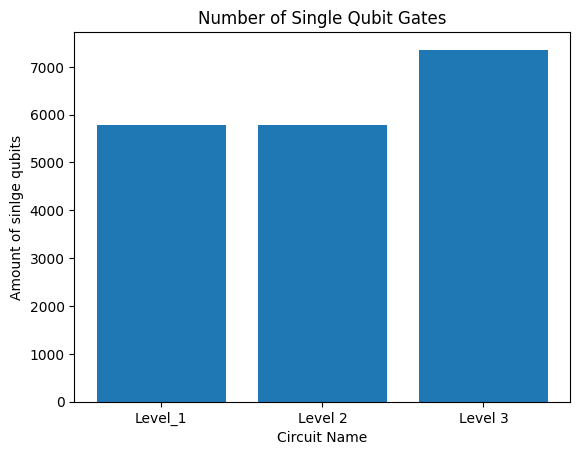

In [23]:
import matplotlib.pyplot as plt

#make a graph that represents the sinlge qubit gates per circuit,
circuits = ['Level_1', 'Level 2', 'Level 3']
single_qubits = [map_qc1['single'], map_qc2['single'], map_qc3['single']]

plt.bar(circuits, single_qubits)
plt.title('Number of Single Qubit Gates')
plt.xlabel('Circuit Name')
plt.ylabel('Amount of sinlge qubits')
plt.show()

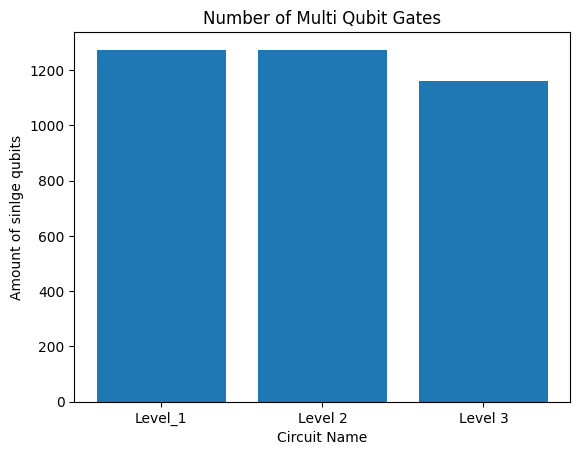

In [19]:
#Then make a bar graph that represents the number of multi_qubit gates per circuit
circuits = ['Level_1', 'Level 2', 'Level 3']
single_qubits = [map_qc1['multi'], map_qc2['multi'], map_qc3['multi']]

plt.bar(circuits, single_qubits)
plt.title('Number of Multi Qubit Gates')
plt.xlabel('Circuit Name')
plt.ylabel('Amount of sinlge qubits')
plt.show()

In [30]:
#what is a better way to represent this data? Maybe another way we can represent it is comparing the amount of multi-qubit gates and single-qubit gates side by side? Ratio???
#What would a ratio show us? The HIGHer the AVERAGE ratio is the better, because that means that there is more single-qubit gates compared to multi-qubit gates.But then whats the best way to
#PLOT a ratio? Maybe a line graph is the best, because it is easy to see ratios (aka which ones are greater, but also, we can see how this ratio changes as we scale up the number of qubits)
import matplotlib.pyplot as plt

######
# passing in a list of circuits, to iterate through each circuit and then calculate the ratio of each single-qubit and multi-qubit gates for each circuit
# SO what we can do is add to a MAP that allows us to keep track of a specific optimization level and then the amount of single/multi qubit gates for that level
# Then we can make a CHART, But the chart cannot use the MAP. The MAP will be used to kinda give a baseline statistic, while the graph will show us how it changes over time
######
def single_multi_ratio_benchmarking(circuits):
        #These list will store the ratios (single // Multi ) of each circuit
    level1_list = []
    level2_list = []
    level3_list = []    
    return_list = []
    
    circuit_counter = 0
    #Step 1: iterate through all circuits
    for circuit in circuits:
        #Transpilation is where the "divide by zero" errors occur
        #Transpile the circuit on all three levels
        qc1 = transpile(circuit, optimization_level= 1, seed_transpiler= 42, backend=backend)
        qc2 = transpile(circuit, optimization_level= 2, seed_transpiler= 42, backend=backend)
        qc3 = transpile(circuit, optimization_level= 3, seed_transpiler= 42, backend=backend)
        print(f"circuit index: {circuit_counter} :completed")
        circuit_counter = circuit_counter + 1
    
        
        #Step 2: Transpile the circuit with level 1, 2 and 3 and collect the data. The return type of this object is a Map with key value pairs 
        # 'single' -- > Number of Single-Qubit Gates           'multi' --> Number of Multi-Qubit gates
        #Update Map Accordingly
        level1_data = num_single_and_multi_qubit_gates(qc1)
        level2_data = num_single_and_multi_qubit_gates(qc2)
        level3_data = num_single_and_multi_qubit_gates(qc3)
        
        #Step 3: Prepare ratio and list that contains all the data
        if level1_data['multi'] > 0:
            level1_ratio = level1_data['single'] / level1_data['multi']
            level1_list.append(level1_ratio)
        else:
            level1_list.append(level1_data['single'])
            
        if level2_data['multi'] > 0:
            level2_ratio = level2_data['single'] / level2_data['multi']
            level2_list.append(level2_ratio)
        else:
            level2_list.append(level1_data['single'])
            
        if level3_data['multi'] > 0:
            level3_ratio = level3_data['single'] / level3_data['multi']
            level3_list.append(level3_ratio)
        else:
            level3_list.append(level1_data['single'])
    
        
    return_list.append(level1_list), return_list.append(level2_list), return_list.append(level3_list)
    number_of_circuits = [i + 2 for i in range(circuit_counter)]
    
    x = np.array(number_of_circuits)
    
    #Calculating Line of BEST FIT: Optimization Level 1
    a, b = np.polyfit(x, np.array(level1_list), 1)
    #Calculating Line of BEST FIT: Optimization Level 2
    c, d = np.polyfit(x, np.array(level2_list), 1)
    #Calculating Line of BEST Fit: Optimization Lebel 3
    e, f = np.polyfit(x, np.array(level3_list), 1)
    
    #--> Optimization Level 1.. etc lols
    plt.scatter(number_of_circuits, level1_list , label = "Optimization Level 1")    
    plt.plot(x, a*x+b) 
    print("The rate of change for optimization Level 1 is: ", a)
    plt.scatter(number_of_circuits, level2_list, label = "Optimization Level 2")
    plt.plot(x, c*x+d)  
    print("The rate of change for optimization level 2 is: ", c)
    plt.scatter(number_of_circuits, level3_list, label = "Optimization Level 3")
    print("The rate of change for optimization level 3 is: ", e)
    plt.plot(x, e*x+f)  
    plt.legend()
    plt.show()  
    
    return return_list
        